In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/50_Startups.csv"
df = pd.read_csv(url)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


preprocessing

In [54]:
state_enc = OneHotEncoder(drop='first')
dummy_state = state_enc.fit_transform(df[['State']]).toarray() # one-hot encoding
# df.drop(columns=['State'], inplace=True) # drop the original column
df = pd.concat([pd.DataFrame(dummy_state),df], axis=1) # concatenate encoded dummy columns
df.head() 

,0,1,R&D Spend,Administration,Marketing Spend,State,Profit
0,0.0,1.0,165349.20,136897.80,471784.10,New York,192261.83
1,0.0,0.0,162597.70,151377.59,443898.53,California,191792.06
2,1.0,0.0,153441.51,101145.55,407934.54,Florida,191050.39
3,0.0,1.0,144372.41,118671.85,383199.62,New York,182901.99
4,1.0,0.0,142107.34,91391.77,366168.42,Florida,166187.94


In [55]:
df.columns = df.columns.astype(str)

training

In [56]:
X = df.drop(columns=['State','Profit'])
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X)

c:\Users\ZAID\miniconda\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [59]:
r2_score(y_test,model.predict(X_test))

0.898726641431984

In [60]:
mean_squared_error(y, y_pred)

1.5026321681628213e+19

In [61]:
model.score(X_test, y_test) * 100

89.8726641431984

In [67]:
df['pred'] = model.predict(scaler.transform(X))
df.head()

,0,1,R&D Spend,Administration,Marketing Spend,State,Profit,pred
0,0.0,1.0,165349.20,136897.80,471784.10,New York,192261.83,191913.727404
1,0.0,0.0,162597.70,151377.59,443898.53,California,191792.06,187861.478390
2,1.0,0.0,153441.51,101145.55,407934.54,Florida,191050.39,183805.404267
3,0.0,1.0,144372.41,118671.85,383199.62,New York,182901.99,173623.190356
4,1.0,0.0,142107.34,91391.77,366168.42,Florida,166187.94,174098.252026


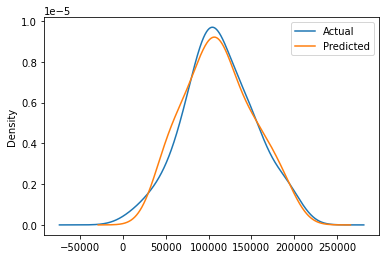

In [75]:
df['Profit'].plot(kind='kde',label='Actual')
df['pred'].plot(kind='kde',label='Predicted')
plt.legend()
plt.show()

In [79]:
px.line(df, y=['Profit','pred'], title='Predicted vs Actual')

In [80]:
from joblib import dump

In [81]:
dump(model,'../../models/startup_profit_v1.pk')

['../../models/startup_profit_v1.pk']

In [83]:
rnd = float(input('enter R&D amount: '))
mkt = float(input('enter market spend: '))
adm = float(input('enter administration spend: '))
state = input('enter state:[New York,California,Florida] ')


In [94]:
dummy_state = state_enc.transform([[state]]).toarray()
inp = np.array([rnd,mkt,adm]).reshape(1,-1)
inp = np.concatenate((dummy_state,inp),axis=1)  
scale_inp = scaler.transform(inp)
profit = model.predict(scale_inp)[0]
print(profit)

128665.25892402141


c:\Users\ZAID\miniconda\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

c:\Users\ZAID\miniconda\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

